In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import pickle


In [2]:
mice = ['4139224.2','4139224.3','4139224.5']

df = pp.load_session_db()
df = df[df['RewardCount']>20]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])




directory already made
G:\My Drive\Figures\TwoTower\SimMats_corr\4139224.2\\4139224.2_17_10_2018_1_


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


G:\My Drive\Figures\TwoTower\SimMats_corr\4139224.2\\4139224.2_18_10_2018_2_


KeyboardInterrupt: 

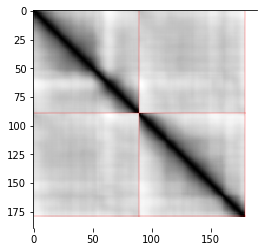

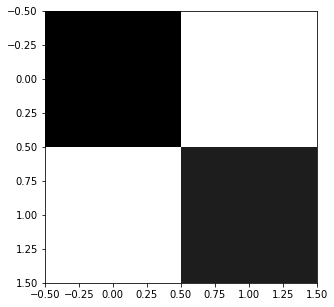

In [3]:
for mouse in mice:

    dirbase = "G:\\My Drive\\Figures\\TwoTower\\SimMats_corr\\%s\\" % mouse
    try:
        os.makedirs(dirbase)
    except:
        print("directory already made")
        
    df_mouse = df[df['MouseName'].str.match(mouse)]
    df_sess = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
    for i in range(df_sess.shape[0]):
        
        fname = "%s\\%s_%s_%d_" % (dirbase,mouse,df_sess['DateFolder'].iloc[i],df_sess['SessionNumber'].iloc[i])
        print(fname)
        S, U, (f,ax_S), (f_U, ax_U) = sm.single_session(df_sess.iloc[i],correct_only=True)
        
